Part 1: Noise Removal

(1)pip install gco-wrapper 3.0.9

pip install opencv- python ,

(2) Write a python program to clean up the noise of the image in Figure 1, by employing an MRF and the binary graphcuts. 

/home/frank62/miniconda3/envs/depth/lib/python3.9/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


(368659,) <class 'numpy.ndarray'>


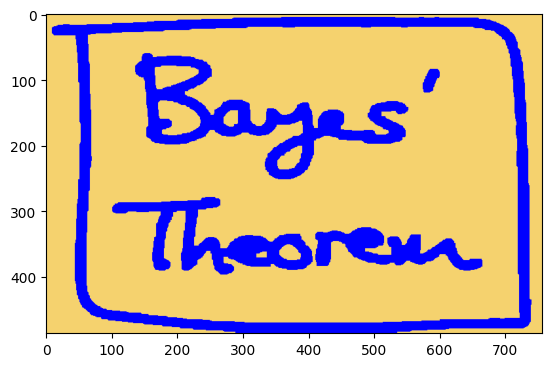

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gco 

m_lambda=200/255

N_image = cv2.imread('./Figure1.png',cv2.IMREAD_COLOR)
N_image = cv2.cvtColor(N_image, cv2.COLOR_BGR2RGB)
source= np.array([0,0,255]) #0 denotes forground
sink=np.array([245, 210, 110]) #1 denotes background
smooth = 1 - np.eye(2)

def get_edges_and_weights(N_image,m_lambda):
    h, w, d = N_image.shape
    E = (h - 1) * w + h * (w - 1)
    edges = np.empty((E, 2), dtype=np.int32)
    edge_weights = np.ones(E, dtype=np.float)
    for i in range(len(edge_weights)):
        edge_weights[i]=m_lambda
    idx = 0
    for row in range(h):
        edges[idx:idx+w-1,0] = np.arange(w-1) + row * w
        edges[idx:idx+w-1,1] = np.arange(w-1) + row * w + 1
        idx += w-1

    # vertical edges
    for col in range(w):
        edges[idx:idx+h-1,0] = np.arange(0, (h-1)*w, w) + col
        edges[idx:idx+h-1,1] = np.arange(w, h*w, w) + col
        idx += h-1
    return [edges, edge_weights]
    
def denoise(N_image, source, sink, m_lambda):
    h, w, d = N_image.shape
    denoised_image=np.zeros([h, w, d])
    Mk_f=np.zeros([h*w, 2])

    for row in range (h):
        for col in range (w):
            color= N_image[row][col]
            d_fg=np.sum(np.abs(color-source))/255.0/3
            d_bg=np.sum(np.abs(color-sink))/255.0/3
            Mk_f[row*w+col][0]=d_fg
            Mk_f[row*w+col][1]=d_bg
    edges, edge_weights=get_edges_and_weights(N_image,m_lambda)
    
    # labels =gco.cut_grid_graph_simple(Mk_f, smooth*m_lambda, n_iter=-1)
    labels = gco.cut_general_graph(edges, edge_weights, Mk_f, smooth, n_iter=-1, algorithm="swap")
    print(labels.shape, type(labels))
    labels = labels.reshape(h,w)
    for row in range(h):
        for col in range(w):
            if labels[row][col]==1:
                denoised_image[row][col]=sink
            else:
                denoised_image[row][col]=source
    denoised_image=(denoised_image).astype(np.uint8)
    plt.imshow(denoised_image)
    
denoise(N_image, source, sink, m_lambda) # m_lambda=200/255

(3) Change the value of the weighting factor (lambda) of the prior term, and show some different results (due to different values of lambda). You must state the values of your lambda along with the corresponding results.

(368659,) <class 'numpy.ndarray'>
(368659,) <class 'numpy.ndarray'>
(368659,) <class 'numpy.ndarray'>
(368659,) <class 'numpy.ndarray'>
(368659,) <class 'numpy.ndarray'>


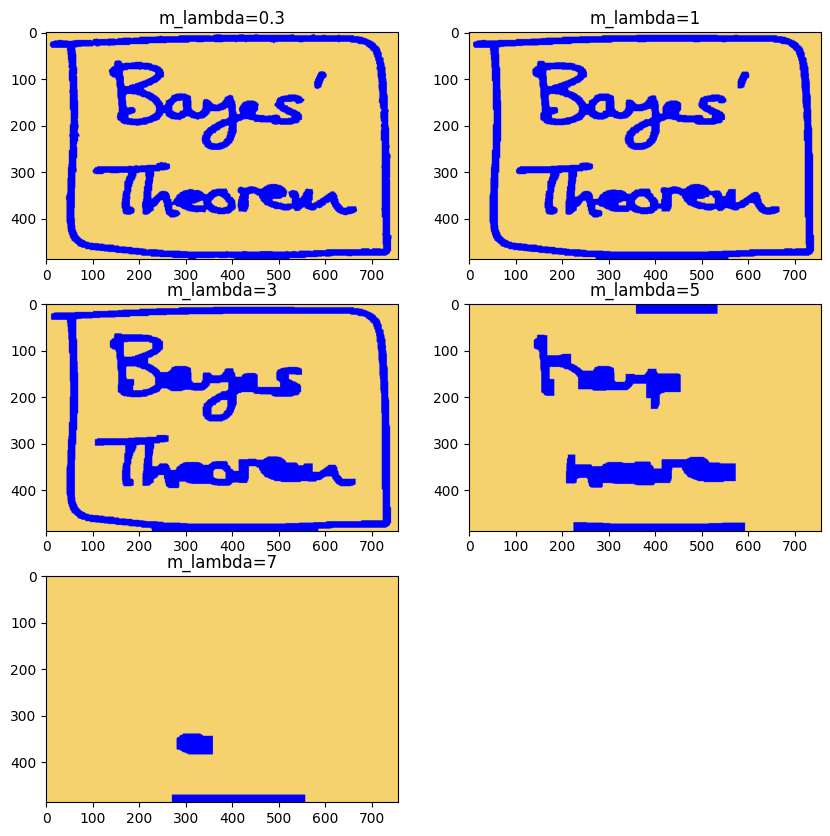

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.title('m_lambda=0.3')
denoise(N_image, source, sink, 0.3)

plt.subplot(322)
plt.title('m_lambda=1')
denoise(N_image, source, sink, 1)

plt.subplot(323)
plt.title('m_lambda=3')
denoise(N_image, source, sink, 3)

plt.subplot(324)
plt.title('m_lambda=5')
denoise(N_image, source, sink, 5)

plt.subplot(325)
plt.title('m_lambda=7')
denoise(N_image, source, sink, 7)


(4)Show your best result and provide some discussion if necessary (particularly if the results are not as good as expected).

According to the tendency of m_lambda from 0.3 to 7, both the noise and the detailed information of N_images are eliminated as the value of m_lambda increases. In order to denoise the image while maintaining the detailed pixels, there should be a trade of between the quality and sepcification of image. The best result achieved when m_lambda = 0.5

(368659,) <class 'numpy.ndarray'>


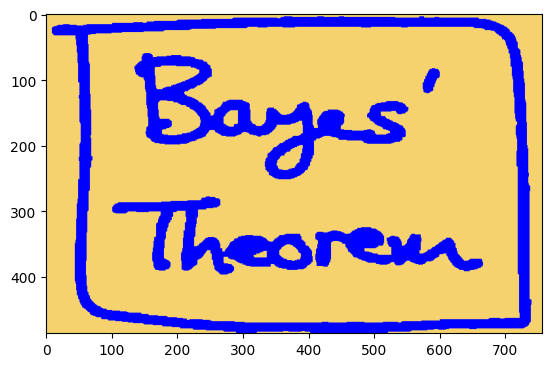

In [28]:
denoise(N_image, source, sink, 0.5)